<a href="https://colab.research.google.com/github/rohitrnath/Fisheye-Camera-Calibration/blob/main/FisheyeProjection_kannala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import cv2

def world_to_image_coordinates(X, Y, Z, transform, K, D):
    world_coords = np.array([X, Y, Z, 1.0])
    camera_coords = np.dot(transform, world_coords)
    X_c, Y_c, Z_c, _ = camera_coords
    x, y, Z_c = Y_c, -Z_c, X_c

    r = np.sqrt((x*x) + (y*y))
    fish_theta = np.arctan2(r,Z_c)
    fish_theta_sq = fish_theta * fish_theta
    fish_dtheta = fish_theta + D[0] * fish_theta * fish_theta_sq + D[1] * fish_theta * fish_theta_sq * fish_theta_sq + D[
        2] * fish_theta * fish_theta_sq * fish_theta_sq * fish_theta_sq + D[3] * fish_theta * fish_theta_sq * fish_theta_sq * fish_theta_sq * fish_theta_sq

    fish_x = K[0][0] * fish_dtheta * (x/r)  + K[0][2]
    fish_y = K[1][1] * fish_dtheta *  (y/r) + K[1][2]


    return fish_x, fish_y


In [25]:
def InvTransMatrix( in_point, yaw, roll, pitch):
  in_point = [ -1*i for i in in_point]
  cy = np.cos(np.radians(yaw))
  sy = np.sin(np.radians(yaw))
  cr = np.cos(np.radians(roll))
  sr = np.sin(np.radians(roll))
  cp = np.cos(np.radians(pitch))
  sp = np.sin(np.radians(pitch))

  x = in_point[0] * (cp * cy) + in_point[1] * (cp * sy) + in_point[2] * (sp)
  y = in_point[0] * (cy * sp * sr - sy * cr) + in_point[1] * (sy * sp * sr + cy * cr) + in_point[2] * (-cp * sr)
  z = in_point[0] * (-cy * sp * cr - sy * sr) + in_point[1] * (-sy * sp * cr + cy * sr) + in_point[2] * (cp * cr)

  transform =   [[cp * cy, cp * sy, sp, x],
                [cy * sp * sr - sy * cr, sy * sp * sr + cy * cr, -cp * sr, y],
                [-cy * sp * cr - sy * sr, -sy * sp * cr + cy * sr, cp * cr, z],
                [0.0, 0.0, 0.0, 1.0]]

  return transform

In [26]:
K = np.array([[320.0, 0, 640.0], [ 0, 320.0, 480.0], [0, 0, 1]])  # Replace with actual intrinsic parameters
D = np.array([0.06038912, 0.02748789, -0.01424526, 0.00145179])  # Replace with actual distortion coefficients

yaw =  179.9
roll = 0.9
pitch = -33.9
x, y, z = -1.982, -0.021, 1.0360

transform = InvTransMatrix( [x, y, z], yaw, roll, pitch)

In [27]:
X, Y, Z = -1+x,  y, 0  # Example world coordinates
u, v = world_to_image_coordinates(X, Y, Z, transform, K, D)
print(f"Image coordinates: ({u}, {v})")

Image coordinates: (641.4573658336308, 547.8235792658606)


In [72]:
image = cv2.imread("/content/rear_carla.png")

In [73]:
font                   = cv2.FONT_HERSHEY_SIMPLEX
fontScale              = 0.5
fontColor              = (0,255,0)
thickness              = 1
lineType               = 2

In [74]:
GroundDistX =  [1, 3, 5, 10, 15, 20, 25, 30,
                1, 3, 5, 10, 15, 20, 25, 30,
                1, 3, 5, 10, 15, 20, 25, 30,
                1, 3, 5, 10, 15, 20, 25, 30,
                1, 3, 5, 10, 15, 20, 25, 30,
                1, 3, 5, 10, 15, 20, 25, 30,
                1, 3, 5, 10, 15, 20, 25, 30,
                1, 3, 5, 10, 15, 20, 25, 30,
                1, 3, 5, 10, 15, 20, 25, 30,
                1, 3, 5, 10, 15, 20, 25, 30]

GroundDistY =[0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1, 1, 1,
              3, 3, 3, 3, 3, 3, 3, 3,
              5, 5, 5, 5, 5, 5, 5, 5,
              10, 10, 10, 10, 10, 10, 10, 10,
              -1, -1, -1, -1, -1, -1, -1, -1,
              -3, -3, -3, -3, -3, -3, -3, -3,
              -5, -5, -5, -5, -5, -5, -5, -5,
              -10, -10, -10, -10, -10, -10, -10, -10]

for xi,yi in zip(GroundDistX, GroundDistY):
  X, Y, Z = x-xi,  y-yi, 0.1
  u, v = world_to_image_coordinates(X, Y, Z, transform, K, D)
  u, v = int(u), int(v)
  # cv2.putText(image, f"{xi},{yi}",
  #   (u,v),
  #   font,
  #   fontScale,
  #   fontColor,
  #   thickness,
  #   lineType)
  image = cv2.circle(image, (u,v), radius=3, color=(0, 255, 0), thickness=-1)

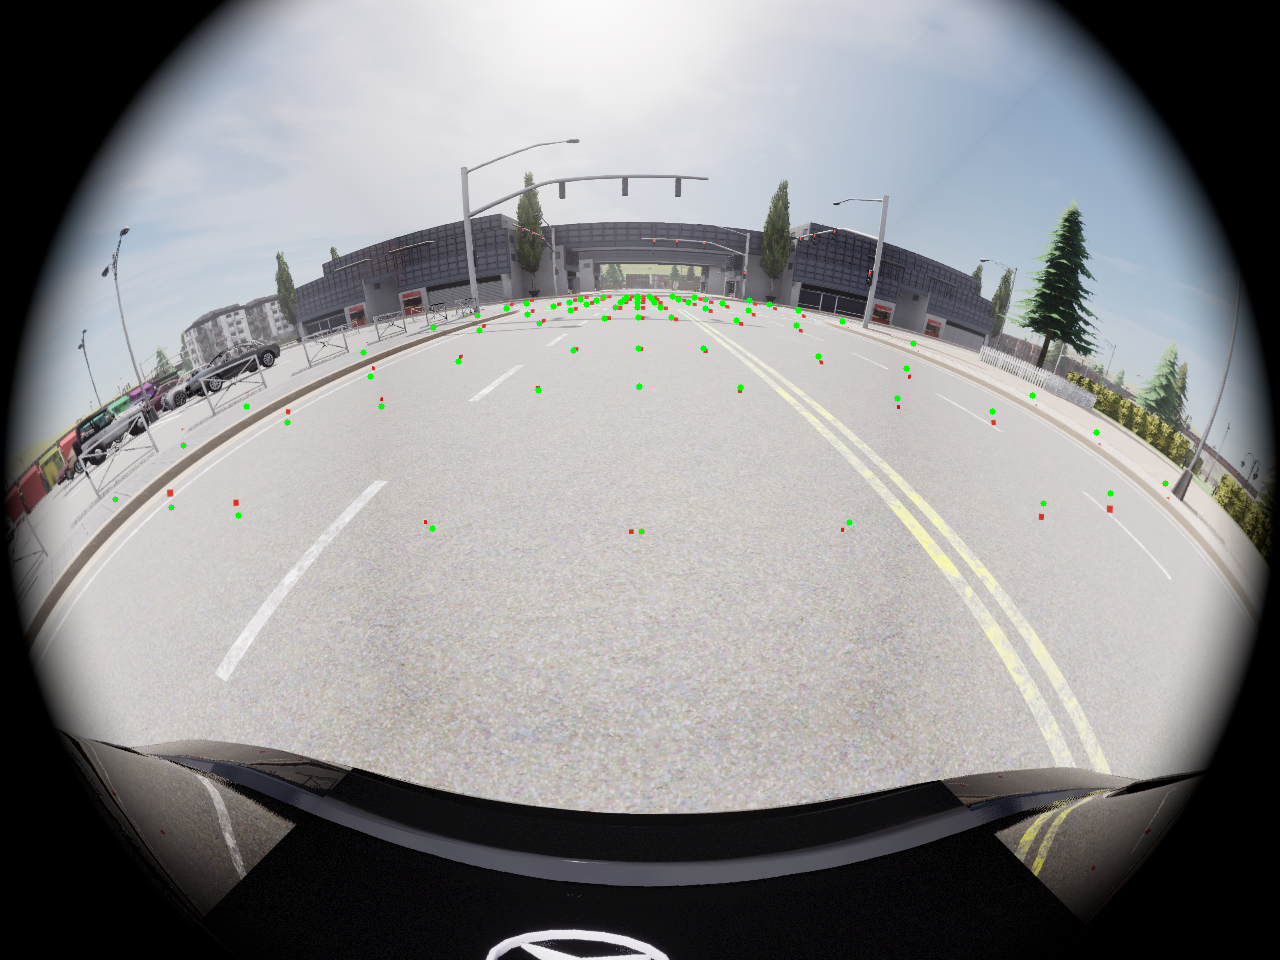

In [75]:
from google.colab.patches import cv2_imshow

cv2_imshow( image)